In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils.path import WilcardPath
from utils.dataloading import read_parquet_summary_file, format_summary_df
import os
from utils.enums import AlignerEnum
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import alignment.ensemble
import alignment.dataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
DATA_DIR = WilcardPath("/hits/fast/cme/bodynems/data/")
RESULT_DIR = WilcardPath("/hits/fast/cme/bodynems/MSA_difficulty/results")

BENCHMARKS = ["balibase3/RV11", "balibase3/RV12"]
INPUT_DIR = DATA_DIR / "input" / "{benchmark}"
OUTPUT_DIR = DATA_DIR / "output" / "{benchmark}"

unaligned_DIR = OUTPUT_DIR / "{dataset}"

FEAT_FILE_PATH = unaligned_DIR / "{file_name}"
TOOL_DIR = unaligned_DIR / "{tool}"

aligned_FEAT_FILE = "aligned_features.parquet"
TOOLS = [aligner for aligner in AlignerEnum]
DATASETS = OUTPUT_DIR.format(benchmark=BENCHMARKS[0]).listdir(dirs_only=True)

In [23]:
reference_features_dfs = []
aligned_features_dfs = []
unaligned_features_dfs = []
for benchmark in [BENCHMARKS[1]]:
    reference_features = pd.read_parquet(
        OUTPUT_DIR.format(benchmark=benchmark) / "reference_features.parquet"
    )
    aligned_features = pd.read_parquet(
        OUTPUT_DIR.format(benchmark=benchmark) / "aligned_features.parquet"
    )
    unaligned_features = pd.read_parquet(
        OUTPUT_DIR.format(benchmark=benchmark) / "unaligned_features.parquet"
    )

    # reference_features["method"] = "reference"
    # reference_features["benchmark"] = benchmark
    # reference_features_dfs.append(reference_features)

    # aligned_features["method"] = "ensemble"
    aligned_features["benchmark"] = benchmark
    aligned_features_dfs.append(aligned_features)

    # unaligned_features["method"] = "dataset"
    unaligned_features["benchmark"] = benchmark
    unaligned_features_dfs.append(unaligned_features)

# reference_features = pd.concat(reference_features_dfs, axis=0, ignore_index=True)
aligned_features = pd.concat(aligned_features_dfs, axis=0, ignore_index=True)
unaligned_features = pd.concat(unaligned_features_dfs, axis=0, ignore_index=True)

In [24]:
# TODO: Remove this cell once "all" is present in output again
if aligned_features.tool.isna().any():
    aligned_features.loc[aligned_features.tool.isna(), "tool"] = "all"

In [37]:
unaligned_features.loc[:, unaligned_features.columns.str.contains("kmer")].describe()

,min_kmer_similarity_15,max_kmer_similarity_15,mean_kmer_similarity_15,median_kmer_similarity_15,std_kmer_similarity_15,min_kmer_similarity_25,max_kmer_similarity_25,mean_kmer_similarity_25,median_kmer_similarity_25,std_kmer_similarity_25
count,88.0,88.000000,88.000000,88.0,88.000000,88.0,88.0,88.0,88.0,88.0
mean,0.0,0.021782,0.000062,0.0,0.001060,0.0,0.0,0.0,0.0,0.0
std,0.0,0.080515,0.000243,0.0,0.003845,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.500000,0.001500,0.0,0.024955,0.0,0.0,0.0,0.0,0.0


In [31]:
pythia_feats = aligned_features.loc[:, aligned_features.columns.str.contains("pythia")]
pythia_feats
# aligned_features.info()

,min_pythia_difficulty,max_pythia_difficulty,mean_pythia_difficulty,median_pythia_difficulty,std_pythia_difficulty
0,0.290584,0.422430,0.356460,0.350859,0.043438
1,0.348545,0.459666,0.398108,0.401444,0.036547
2,0.410347,0.410347,0.410347,0.410347,0.000000
3,0.412016,0.412016,0.412016,0.412016,0.000000
4,0.290584,0.459666,0.394233,0.410347,0.036195
...,...,...,...,...,...
435,0.067718,0.103988,0.090681,0.094187,0.009889
436,0.102999,0.119802,0.108179,0.103862,0.007041
437,0.067718,0.067718,0.067718,0.067718,0.000000
438,0.116467,0.116467,0.116467,0.116467,0.000000


<Axes: ylabel='Density'>

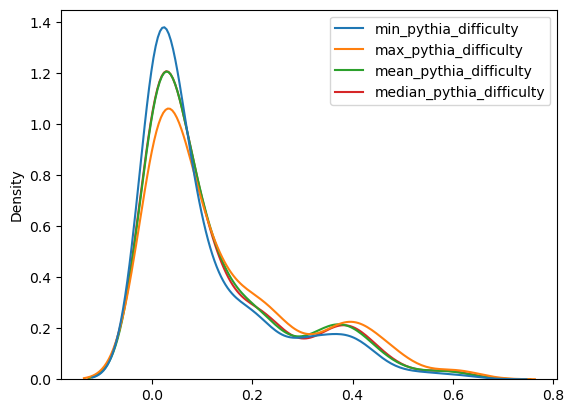

In [34]:
sns.kdeplot(pythia_feats.drop("std_pythia_difficulty", axis=1))